In [12]:
import numpy as np
import control as ctrl
import matplotlib.pyplot as plt

In [13]:
M = 0.5
m = 0.2
b = 0.1
I = 0.006
g = 9.8
l = 0.3

In [19]:
p = I*(M+m)+M*m*l**2 # denominator for the A and B matrices

A = np.array([[0, 1, 0, 0],
     [0, -(I+m*l**2)*b/p, (m**2*g*l**2)/p, 0],
     [0, 0, 0, 1],
     [0, -(m*l*b)/p, m*g*l*(M+m)/p, 0]])

B = np.array([[0],
             [(I+m*l**2)/p],
             [0],
             [m*l/p]])

#C = np.array([[1, 0, 0, 0],
#              [0, 0, 1, 0]])

C = np.array([1, 0, 0, 0])

inv_pend_ss = ctrl.StateSpace(A, B, C, 0)
inv_pend_ss

StateSpace(array([[ 0.        ,  1.        ,  0.        ,  0.        ],
       [ 0.        , -0.18181818,  2.67272727,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  1.        ],
       [ 0.        , -0.45454545, 31.18181818,  0.        ]]), array([[0.        ],
       [1.81818182],
       [0.        ],
       [4.54545455]]), array([[1., 0., 0., 0.]]), array([[0.]]))

In [15]:
eigenvalues = np.linalg.eigvals(A)
eigenvalues

array([ 0.        , -0.14283164, -5.60409413,  5.56510758])

/home/belphegor/.local/lib/python3.11/site-packages/control/timeresp.py:1197: RuntimeWarning: overflow encountered in matmul
  xout[:, i] = (Ad @ xout[:, i-1]
/home/belphegor/.local/lib/python3.11/site-packages/control/timeresp.py:1197: RuntimeWarning: invalid value encountered in matmul
  xout[:, i] = (Ad @ xout[:, i-1]
/home/belphegor/.local/lib/python3.11/site-packages/control/timeresp.py:1199: RuntimeWarning: invalid value encountered in matmul
  yout = C @ xout + D @ U


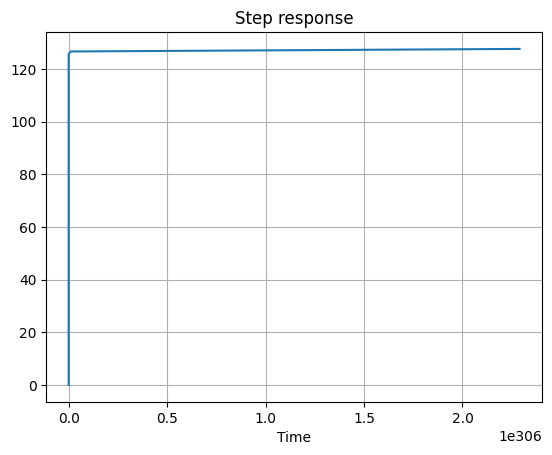

In [20]:
# Respuesta ante una entrada de tipo 'step'
yout, t, x = ctrl.step_response(inv_pend_ss, return_x = True)

plt.figure()
plt.plot(t, yout)
plt.title('Step response')
plt.xlabel('Time')
plt.grid('minor')
plt.show()

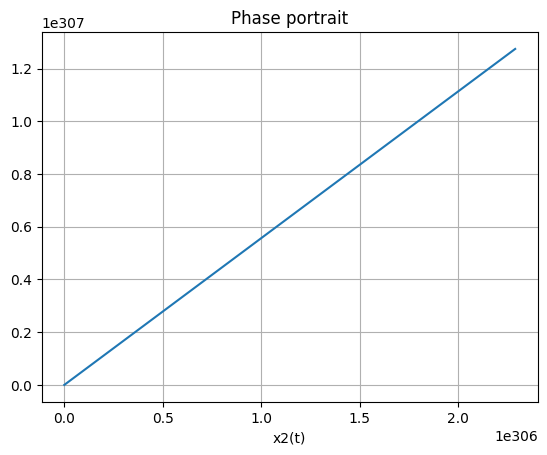

In [21]:
# Retrato fase
plt.figure()
plt.plot(x[0,:], x[1,:])
plt.title('Phase portrait')
plt.xlabel('x1(t)')
plt.xlabel('x2(t)')
plt.grid('minor')
plt.show()

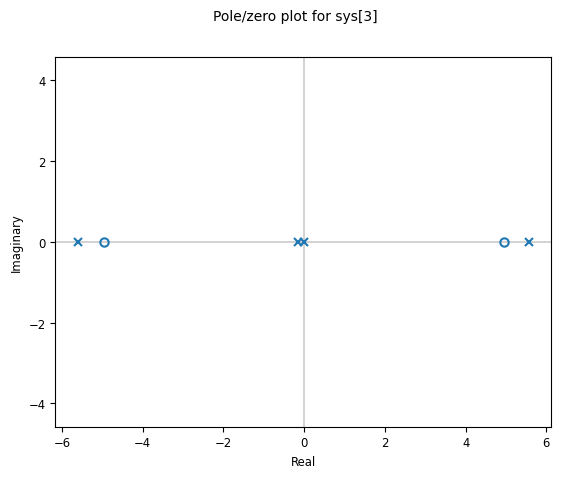

In [22]:
plt.figure()
ctrl.pzmap(inv_pend_ss)
plt.show()